In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft

# Определение исходных данных

In [ ]:
a_0 = 1
f_0 = 30
beta = 45
t_0 = 0.2
phi_0 = np.pi/2
T = 0.5
delta_t = 0.002
np.random.seed(0)

# фильтр низких частот (ФНЧ)

# Генерация последовательности в виде аддитивной смеси сигнала и шума

In [ ]:
t_i = np.arange(0, T+delta_t, delta_t)

In [ ]:
s = a_0 * np.exp(-beta**2 * (t_i - t_0)**2) * np.cos(2 * np.pi * f_0 * (t_i - t_0) + phi_0)

eps = np.random.normal(0, a_0 / 2, len(t_i))

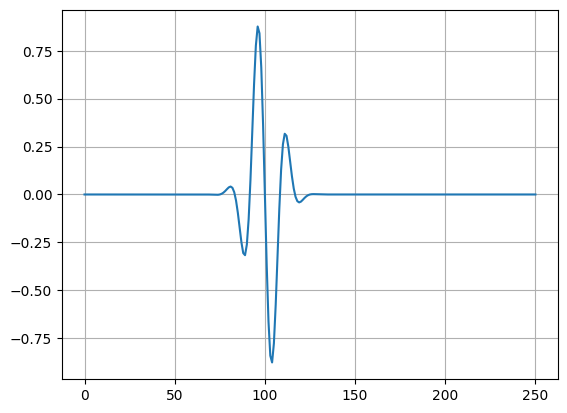

In [ ]:
plt.plot(s)
plt.grid(True)

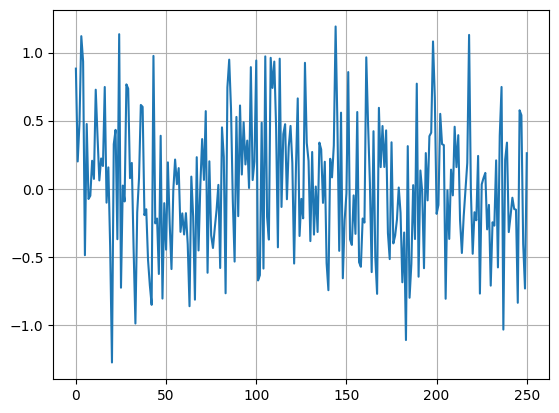

In [ ]:
plt.plot(eps)
plt.grid(True)

In [ ]:
x = s + eps

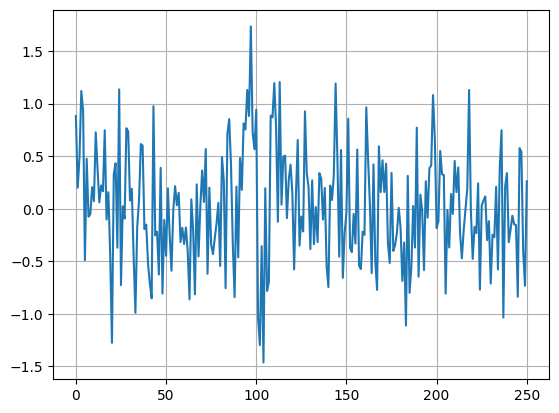

In [ ]:
plt.plot(x)
plt.grid(True)

# Выполним операцию свертки

In [ ]:
f_1 = 1
f_2 = f_3 = 13
f_4 = 26

In [ ]:
h = lambda k: 1 / (2 * np.pi * k * delta_t) * ((np.sin(2 * np.pi * k * delta_t * f_4) + np.sin(2 * np.pi * k * delta_t * f_3)) / (1 - 4 * k**2 * delta_t**2 * (f_4 - f_3)**2) - (np.sin(2 * np.pi * k * delta_t * f_2) + np.sin(2 * np.pi * k * delta_t * f_1)) / (1 - 4 * k**2 * delta_t**2 * (f_2 - f_1)**2))

In [ ]:
h_1 = lambda k: 1 / (2 * np.pi * k * delta_t) * ((np.sin(2 * np.pi * k * delta_t * f_4) + np.sin(2 * np.pi * k * delta_t * f_3)) / (1 - 4 * k**2 * delta_t**2 * (f_4 - f_3)**2))

In [ ]:
N = x.shape[0]
M = 30

In [ ]:
h_data = [h_1(k) for k in range(1, M+1)]

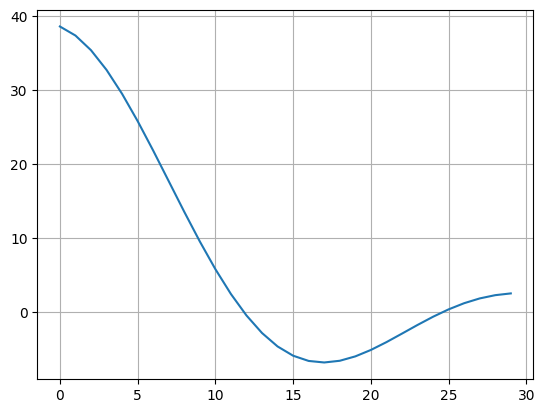

In [ ]:
plt.plot(h_data)
plt.grid(True)

In [ ]:
filtred_x = np.convolve(x, h_data, mode='full')[:N+1]/(N+1)

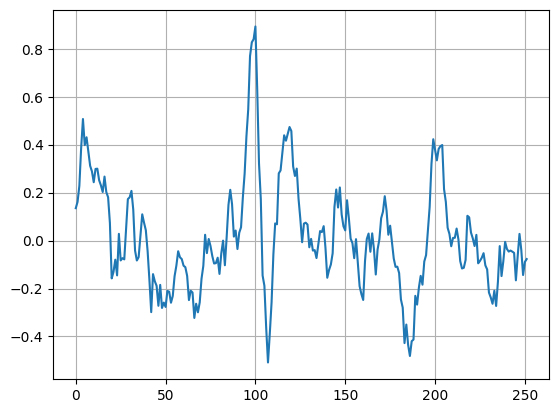

In [ ]:
plt.plot(filtred_x)
plt.grid(True)

In [ ]:
#for i in range(N):
#  if (i<=M):
#    filtred_x[i] = filtred_x[i]/(N-i)
#  elif (i < N-M):
#    filtred_x[i] = filtred_x[i]/(N-M)
#  else:
#    filtred_x[i] = filtred_x[i]/(i)

In [ ]:
y = fft(x)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


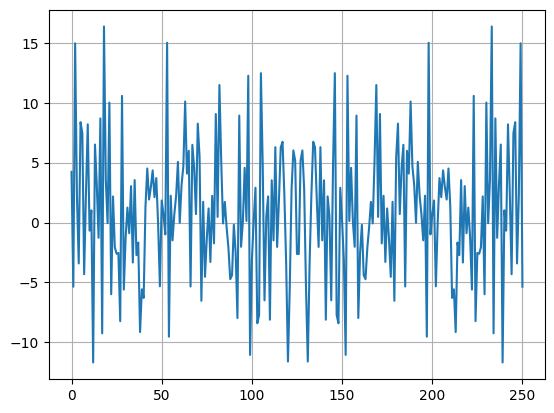

In [ ]:
plt.plot(y)
plt.grid(True)

In [ ]:
y_filtr = fft(filtred_x)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


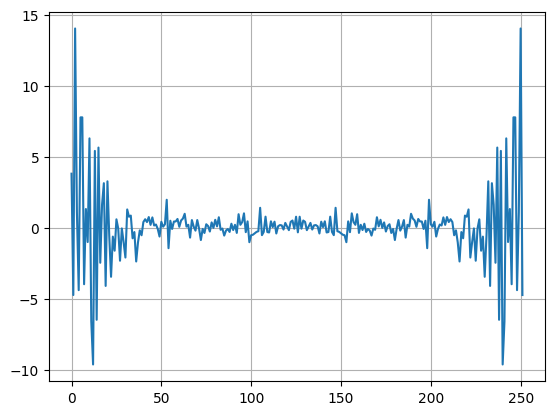

In [ ]:
plt.plot(y_filtr)
plt.grid(True)